intro bla bla

# 1 - Import libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# 2 - Read and transform data

In [2]:
# read the data from de .csv file ---------------------
data = pd.read_csv('country_INC_LE_IR.csv')

In [3]:
# check the size of the data -------------------------
data.shape

(180, 4)

In [4]:
# check for null's ------------------------------------
data.isnull().sum()
# no null values in data

country    0
INC        0
LE         0
IR         0
dtype: int64

In [5]:
## show all data to check for strange values ----------
#pd.set_option('display.max_rows', len(data))
#data
## all values are OK 

In [6]:
# show example data -----------------------------------
data.head()

,country,INC,LE,IR
0,Afghanistan,1637,55,4
1,Albania,9374,76,45
2,Algeria,12494,76,12
3,Andorra,38982,84,81
4,Angola,7047,60,10


**Transform** INC by replacing its vaule with the log of that value

In [11]:
data['INC'] = np.log(data['INC']).round(2)
data.head()

,country,INC,LE,IR
0,Afghanistan,7.40,55,4
1,Albania,9.15,76,45
2,Algeria,9.43,76,12
3,Andorra,10.57,84,81
4,Angola,8.86,60,10


**country**: the full name of a country as used by gapminder   

**income per person** (INC): logaritm of the 2010 Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.  

**life expectancy** (LE): 2011 life expectancy at birth (years) The average number of years a newborn child would live if current mortality patterns were to stay the same. **NOTE** rounded to whole years.  

**internet use rate** (IR): 2010 Internet users (per 100 people) Internet users are people with access to the worldwide network. **NOTE** rounded to integer. 

# 3 - Produce figures

### Figure 1 - life expectancy for 180 countries

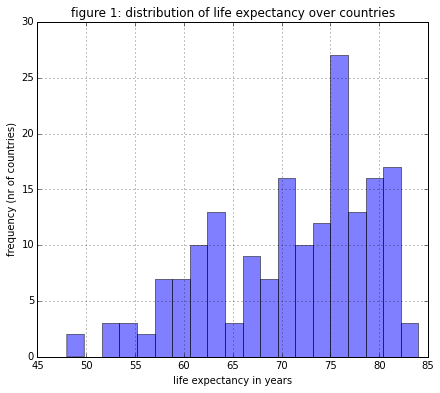

In [12]:
%matplotlib inline

data['LE'].hist(bins=20, grid=True, figsize = (7, 6), alpha=0.5)
plt.title('figure 1: distribution of life expectancy over countries')
plt.xlabel('life expectancy in years')
plt.ylabel('frequency (nr of countries)')

### Figure 2 - life expectancy by income

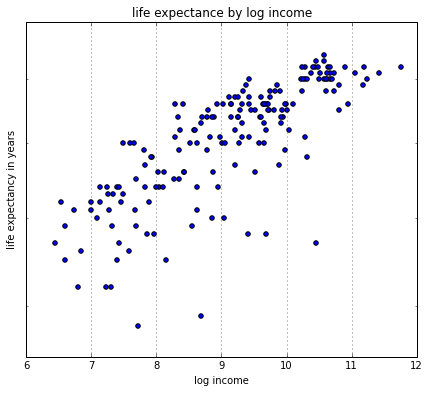

In [18]:
data[['INC','LE']].plot(x='INC', y='LE', kind='scatter', logy=True, figsize = (7, 6))
plt.title('life expectance by log income')
plt.ylabel('life expectancy in years')
plt.xlabel('log income')
plt.grid(True)
plt.ylim((45,90))
plt.xlim((6,12))
plt.show()

### Figure 3 - life expectancy by internet use rate

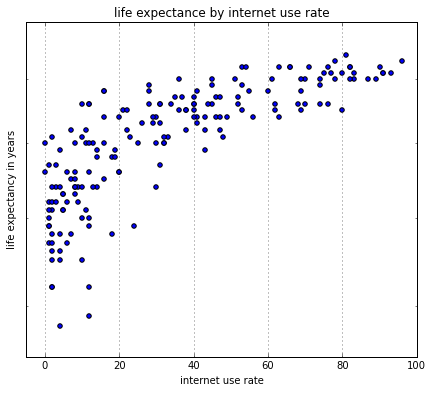

In [17]:
data[['IR','LE']].plot(x='IR', y='LE', kind='scatter', logy=True, figsize = (7, 6))
plt.title('life expectance by internet use rate')
plt.ylabel('life expectancy in years')
plt.xlabel('internet use rate')
plt.grid(True)
plt.ylim((45,90))
plt.xlim((-5,100))
plt.show()

# 4 - Multiple linear regresion model

In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['IR'],data['LE'])
print( 'slope    ', slope    )
print( 'intercept', intercept)
print( 'r value  ', r_value  )
print( 'p_value  ', p_value  )
print( 'stan dev ', std_err  )

slope     0.24220540974
intercept 62.8662011771
r value   0.798644010384
p_value   4.12455205999e-41
stan dev  0.0136796656665


In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['INC'],data['LE'])
print( 'slope    ', slope    )
print( 'intercept', intercept)
print( 'r value  ', r_value  )
print( 'p_value  ', p_value  )
print( 'stan dev ', std_err  )

slope     5.41892324453
intercept 21.6819719557
r value   0.797140123618
p_value   7.43810862688e-41
stan dev  0.307650324324


In [46]:
X = sm.add_constant(data[['INC','IR']]) 
y = data['LE']
results = sm.OLS(y, X).fit()
#results.summary()
print(results.summary()) 


                            OLS Regression Results                            
Dep. Variable:                     LE   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     199.4
Date:                Sat, 14 Nov 2015   Prob (F-statistic):           4.52e-46
Time:                        20:53:12   Log-Likelihood:                -529.65
No. Observations:                 180   AIC:                             1065.
Df Residuals:                     177   BIC:                             1075.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         39.9726      4.111      9.724      0.0

#References

http://matplotlib.org/users/pyplot_tutorial.html

http://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python

http://stackoverflow.com/questions/11479064/multivariate-linear-regression-in-python

http://stackoverflow.com/questions/20701484/why-do-i-get-only-one-parameter-from-a-statsmodels-ols-fit
